## FINAL PROJECT

| Mã số sinh viên | Họ tên           |
| --------------- | --------------- |
| 20120352           | Vũ Hoàng Phúc   |
| 20120322           | Đặng Thiên Long |
| 2012           |        |

**Link github**: https://github.com/phuccr7/coding4DS

### Import các thư viện cần thiết

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

## Thu thập dữ liệu

### Football Players Data

Bộ dữ liệu này cung cấp thông tin chi tiết khoảng 17000 cầu thủ bóng đá của FIFA, được thu thập từ SoFIFA.com.

Nó bao gồm một loại các dữ liệu cụ thể của cầu thủ bao gồm tên , quốc tịch, câu lạc bộ, xếp hạng cầu thủ, tiềm năng, vị trí , tuổi tác và nhiều thuộc tính khác nữa. Bộ dữ liệu này lý tưởng cho những người yêu thích bóng đá, các nhà phân tích dữ liệu và những người nghiên cữu muốn tiến hành phân tích sâu, nghiên cứu thống kê hoặc thực hiện những dự án máy học liên quan tới đặc điểm, sự tiến triển sự nghiệp của các cầu thủ bóng đá. 

**License**: Apache 2.0  :  Giấy phép này cho phép người dùng có thể tự do  sử dụng tập dữ liệu với mọi mục đích mà không có bất kỳ rủi ro nào.

**Cách tác giả thu thập dữ liệu:**  Crawl dữ liệu các cầu thủ từ web https://sofifa.com./

**Nguồn**: https://www.kaggle.com/datasets/maso0dahmed/football-players-data

## Khám phá dữ liệu

### Load dữ liệu

In [3]:
df=pd.read_csv('./data/fifa_players.csv')
df.head()

name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties  \
0          94          48            22           94      94         75   
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking standing_tackle  sliding_tackle  
0        96       33              28              26  
1        88       59              57              22  
2        87       63              67              67  
3        83       51              24              22  
4        80       91              88              87  

[5 rows x 51 columns]

### Dữ liệu có bao nhiêu dòng bao và bao nhiêu cột

In [4]:
n_rows,n_cols=df.shape
print(f'Số dòng : ', n_rows)
print(f'Số cột :', n_cols)

Số dòng :  17954
Số cột : 51


Như vậy ta thấy dữ liệu đưa vào có 17954 dòng và 51 cột

### Các dòng dữ liệu

#### Ý nghĩa của từng dòng dữ liệu ?

In [5]:
df.sample(10)

name                      full_name  birth_date  age  \
59     João Cancelo      João Pedro Cavaco Cancelo   5/27/1994   24   
7986      E. Dahlin                    Erik Dahlin   4/28/1989   29   
12402      K. Ziani      Karim Koceila Yanis Ziani   8/17/1982   36   
420       A. Szalai                    Ádám Szalai   12/9/1987   31   
9949      Z. Gordon                   Ziggy Gordon   4/23/1993   25   
3241      L. Fenton     Louis Ferenc Puskas Fenton    4/3/1993   25   
8034       E. Ávila  Edwin Ernesto Ávila Peñaranda   9/24/1986   32   
11213     G. Tansey                    Greg Tansey  11/21/1988   30   
2040     H. Akbunar                  Halil Akbunar   11/9/1993   25   
11499  J. Hardeveld                 Jeff Hardeveld   2/27/1995   24   

       height_cm  weight_kgs  positions  nationality  overall_rating  \
59        182.88        73.9         RB     Portugal              83   
7986      185.42        84.8         GK       Sweden              62   
12402     170.18        66.2         RM      Algeria              68   
420       193.04        89.8         ST      Hungary              76   
9949      154.94        77.1  CB,RB,RWB     Scotland              64   
3241      175.26        69.9  RWB,RB,RW  New Zealand              63   
8034      182.88        77.1         CB     Colombia              62   
11213     185.42        78.0     CDM,CM      England              66   
2040      167.64        60.8      RM,LM       Turkey              68   
11499     182.88        74.8      CB,LB  Netherlands              66   

       potential  ...  long_shots  aggression interceptions  positioning  \
59            89  ...          66          73            77           78   
7986          64  ...          12          27            24           12   
12402         68  ...          65          68            51           69   
420           76  ...          64          74            41           78   
9949          67  ...          24          76            59           46   
3241          66  ...          45          48            59           63   
8034          62  ...          13          70            61           21   
11213         66  ...          73          54            60           60   
2040          71  ...          45          52            33           66   
11499         70  ...          36          62            69           48   

       vision  penalties composure  marking standing_tackle  sliding_tackle  
59         74         46        77       79              79              79  
7986       28         35        49       21              14              14  
12402      72         68        70       51              54              48  
420        65         76        75       31              41              13  
9949       39         42        56       57              67              65  
3241       62         45        56       57              54              55  
8034       27         36        54       63              60              56  
11213      68         73        68       63              64              61  
2040       67         50        55       35              29              39  
11499      45         64        67       65              64              67  

[10 rows x 51 columns]

• Mỗi dòng trong tập dữ liệu trên ứng với thông tin của một cầu thủ thuộc FIFA . Nhìn chung ta không thấy có dòng nào bị lạc loài ( có ý nghĩa khác so với các dòng còn lại)

#### Dữ liệu có bị lặp hay không ?

In [6]:
is_duplicated=df.duplicated().any()
is_duplicated

False

- Vì dữ liệu không bị lặp nên ta không cần tiến hành xử lý lặp. 

### Các cột dữ liệu

#### Mỗi cột có ý nghĩa gì ?

In [7]:


# Lấy danh sách các cột từ DataFrame
columns = list(df.columns.values)

# Hiển thị toàn bộ danh sách các cột
display(HTML("<table><tr>{}</tr></table>".format(
    "</tr><tr>".join("<td>{}</td>".format(column) for column in columns)
)))


| Column                         | Description                                                      |
| ------------------------------ | -----------------------------------------------------------------|
| name                           | Tên cầu thủ                                                      |
| full_name                      | Tên đầy đủ                                                       |
| birth_date                     | Ngày sinh                                                        |
| age                            | Tuổi                                                             |
| height_cm                      | Chiều cao (Đơn vị: cm)                                           |
| weight_kgs                     | Cân nặng (Đơn vị: kg)                                            |
| positions                      | Vị trí chơi của cầu thủ                                          |
| nationality                    | Quốc tịch                                                        |
| overall_rating                 | Điểm đánh giá tổng quát theo FIFA                                |
| potential                      | Điểm đánh giá tiềm năng theo thang điểm của FIFA                 |
| value_euro                     | Giá trị chuyển nhượng (Đơn vị: Euro)                             |
| wage_euro                      | Lương tính theo tuần (Đơn vị: Euro)                              |
| preferred_foot                 | Chân thuận                                                       |
| international_reputation(1-5)  | Đánh giá độ nổi tiếng từ 1-5                                     |
| weak_foot(1-5)                 | Đánh giá chân không thuận từ 1-5                                 |
| skill_moves(1-5)               | Đánh giá khả năng kĩ thuật từ 1-5                                |
| body_type                      | Loại thể hình                                                    |
| release_clause_euro            | Điều khoản giải phóng hợp đồng (Đơn vị: Euro)                    | 
| national_team                  | Đội tuyển quốc gia                                               |
| national_rating                | Xếp hạng của đội tuyển quốc gia                                  |
| national_team_position         | Vị trí chơi tại đội tuyển quốc gia                               |
| national_jersey_number         | Số áo ở đội tuyển quốc gia                                       |
| crossing                       | Chỉ số tạt bóng                                                  |
| finishing                      | Chỉ số dứt điểm                                                  |
| heading_accuracy               | Chỉ số đánh đầu                                                  |
| short_passing                  | Chỉ số chuyền ngắn                                               |
| volleys                        | Chỉ số vô lê                                                     |
| dribbling                      | Chỉ số rê bóng                                                   |
| curve                          | Chỉ số sút xoáy                                                  |
| freekick_accuracy              | Chỉ số đá phạt                                                   |
| long_passing                   | Chỉ số chuyền dài                                                |
| ball_control                   | Chỉ số kiểm soát bóng                                            |
| acceleration                   | Chỉ số tăng tốc                                                  |
| sprint_speed                   | Chỉ số chạy lướt rút                                             |
| agility                        | Chỉ số nhanh nhẹn                                                |
| reactions                      | Chỉ số phản ứng                                                  |
| balance                        | Chỉ số thăng bằng                                                |
| shot_power                     | Chỉ số lực sút                                                   |
| jumping                        | Chỉ số nhảy                                                      |
| stamina                        | Chỉ số sức bền                                                   |
| strength                       | Chỉ số thể lực                                                   |
| long_shots                     | Chỉ số sút xa                                                    |
| aggression                     | Chỉ số quyết liệt                                                |
| interceptions                  | Chỉ số đánh chặn                                                 |
| positioning                    | Chỉ số chọn vị trí                                               |
| vision                         | Chỉ số nhãn quan                                                 |
| penalties                      | Chỉ số sút penalty                                               |
| composure                      | Chỉ số bình tĩnh                                                 |
| marking                        | Chỉ số theo kèm                                                  |
| standing_tackle                | Chỉ số tắc bóng                                                  |
| sliding_tackle                 | Chỉ số xoạc bóng                                                 |


**Nhận xét**

- Ở đây có rất nhiều cột dữ liệu. Tuy nhiên các cột dữ liệu gồm một số loại chính: 
    - Thông tin cá nhân
    - Thông tin đội tuyển quốc gia
    - Thông số chuyên môn
- Để có thể dễ dàng theo dõi và phân tích ta có thể lược bỏ một số cột không cần thiết, ... 

#### Mỗi cột đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp không ?

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.dtypes


name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

### Nhận xét:
- Hầu như các cột đã có dữ liệu phù hợp tuy nhiên cột `birth_date` tức là ngày sinh nên được chuyển sang dạng `datetime`

#### Chuyển kiểu dữ liệu của cột `birth_date` thành `datetime`

In [9]:
# Chuyển cột birth_date sang dạng datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Kiểm tra lại kiểu dữ liệu của cột birth_date
df['birth_date'].head(10)

0   1987-06-24
1   1992-02-14
2   1993-03-15
3   1991-06-04
4   1991-06-20
5   1991-07-08
6   1998-12-20
7   1988-06-02
8   1986-03-27
9   1987-02-14
Name: birth_date, dtype: datetime64[ns]

#### Với những cột dữ liệu dạng số (numerical) các giá trị được phân bố như nào ?

#### Số giá trị, giá trị trung bình, độ lệch chuẩn, min, 25 %, 50%, 70%, max của các cột dữ liệu số

In [10]:
df.describe()

birth_date           age     height_cm  \
count                          17954  17954.000000  17954.000000   
mean   1993-02-17 21:53:21.381307648     25.565445    174.946921   
min              1973-02-01 00:00:00     17.000000    152.400000   
25%              1989-11-02 00:00:00     22.000000    154.940000   
50%              1993-06-30 00:00:00     25.000000    175.260000   
75%              1996-12-30 00:00:00     29.000000    185.420000   
max              2002-02-26 00:00:00     46.000000    205.740000   
std                              NaN      4.705708     14.029449   

         weight_kgs  overall_rating     potential    value_euro  \
count  17954.000000    17954.000000  17954.000000  1.769900e+04   
mean      75.301047       66.240169     71.430935  2.479280e+06   
min       49.900000       47.000000     48.000000  1.000000e+04   
25%       69.900000       62.000000     67.000000  3.250000e+05   
50%       74.800000       66.000000     71.000000  7.000000e+05   
75%       79.800000       71.000000     75.000000  2.100000e+06   
max      110.200000       94.000000     95.000000  1.105000e+08   
std        7.083684        6.963730      6.131339  5.687014e+06   

           wage_euro  international_reputation(1-5)  weak_foot(1-5)  \
count   17708.000000                   17954.000000    17954.000000   
mean     9902.134628                       1.111674        2.945695   
min      1000.000000                       1.000000        1.000000   
25%      1000.000000                       1.000000        3.000000   
50%      3000.000000                       1.000000        3.000000   
75%      9000.000000                       1.000000        3.000000   
max    565000.000000                       5.000000        5.000000   
std     21995.593750                       0.392168        0.663691   

       skill_moves(1-5)  release_clause_euro  national_rating  \
count      17954.000000         1.611700e+04       857.000000   
mean           2.361034         4.622522e+06        76.341890   
min            1.000000         1.300000e+04        63.000000   
25%            2.000000         5.250000e+05        73.000000   
50%            2.000000         1.200000e+06        75.000000   
75%            3.000000         3.500000e+06        81.000000   
max            5.000000         2.265000e+08        85.000000   
std            0.763223         1.129077e+07         4.786667   

       national_jersey_number      crossing     finishing  heading_accuracy  \
count              857.000000  17954.000000  17954.000000      17954.000000   
mean                12.456243     49.697672     45.358249         52.148212   
min                  1.000000      5.000000      2.000000          4.000000   
25%                  6.000000     38.000000     30.000000         44.000000   
50%                 12.000000     54.000000     49.000000         56.000000   
75%                 18.000000     64.000000     62.000000         64.000000   
max                 99.000000     93.000000     95.000000         94.000000   
std                  8.098157     18.483310     19.640792         17.521819   

       short_passing       volleys     dribbling         curve  \
count   17954.000000  17954.000000  17954.000000  17954.000000   
mean       58.566058     42.755208     55.278991     47.101147   
min         7.000000      3.000000      4.000000      6.000000   
25%        53.000000     30.000000     49.000000     34.000000   
50%        62.000000     44.000000     61.000000     49.000000   
75%        68.000000     57.000000     68.000000     62.000000   
max        93.000000     90.000000     97.000000     94.000000   
std        14.863178     17.802936     19.091876     18.536621   

       freekick_accuracy  long_passing  ball_control  acceleration  \
count       17954.000000  17954.000000  17954.000000  17954.000000   
mean           42.688092     52.667428     58.223906     64.696224   
min             3.000000      9.000000      5.000000     12.000000

In [11]:
# Chọn các cột số từ DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

numerical_df=df[numerical_columns]



### Phân phối của cầu thủ theo độ tuổi

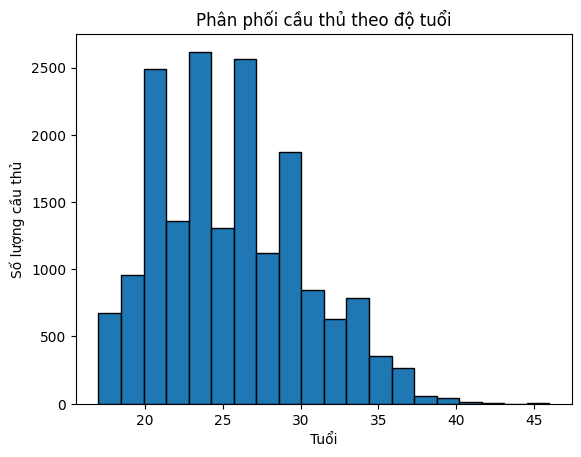

In [12]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Phân phối cầu thủ theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng cầu thủ')
plt.show()

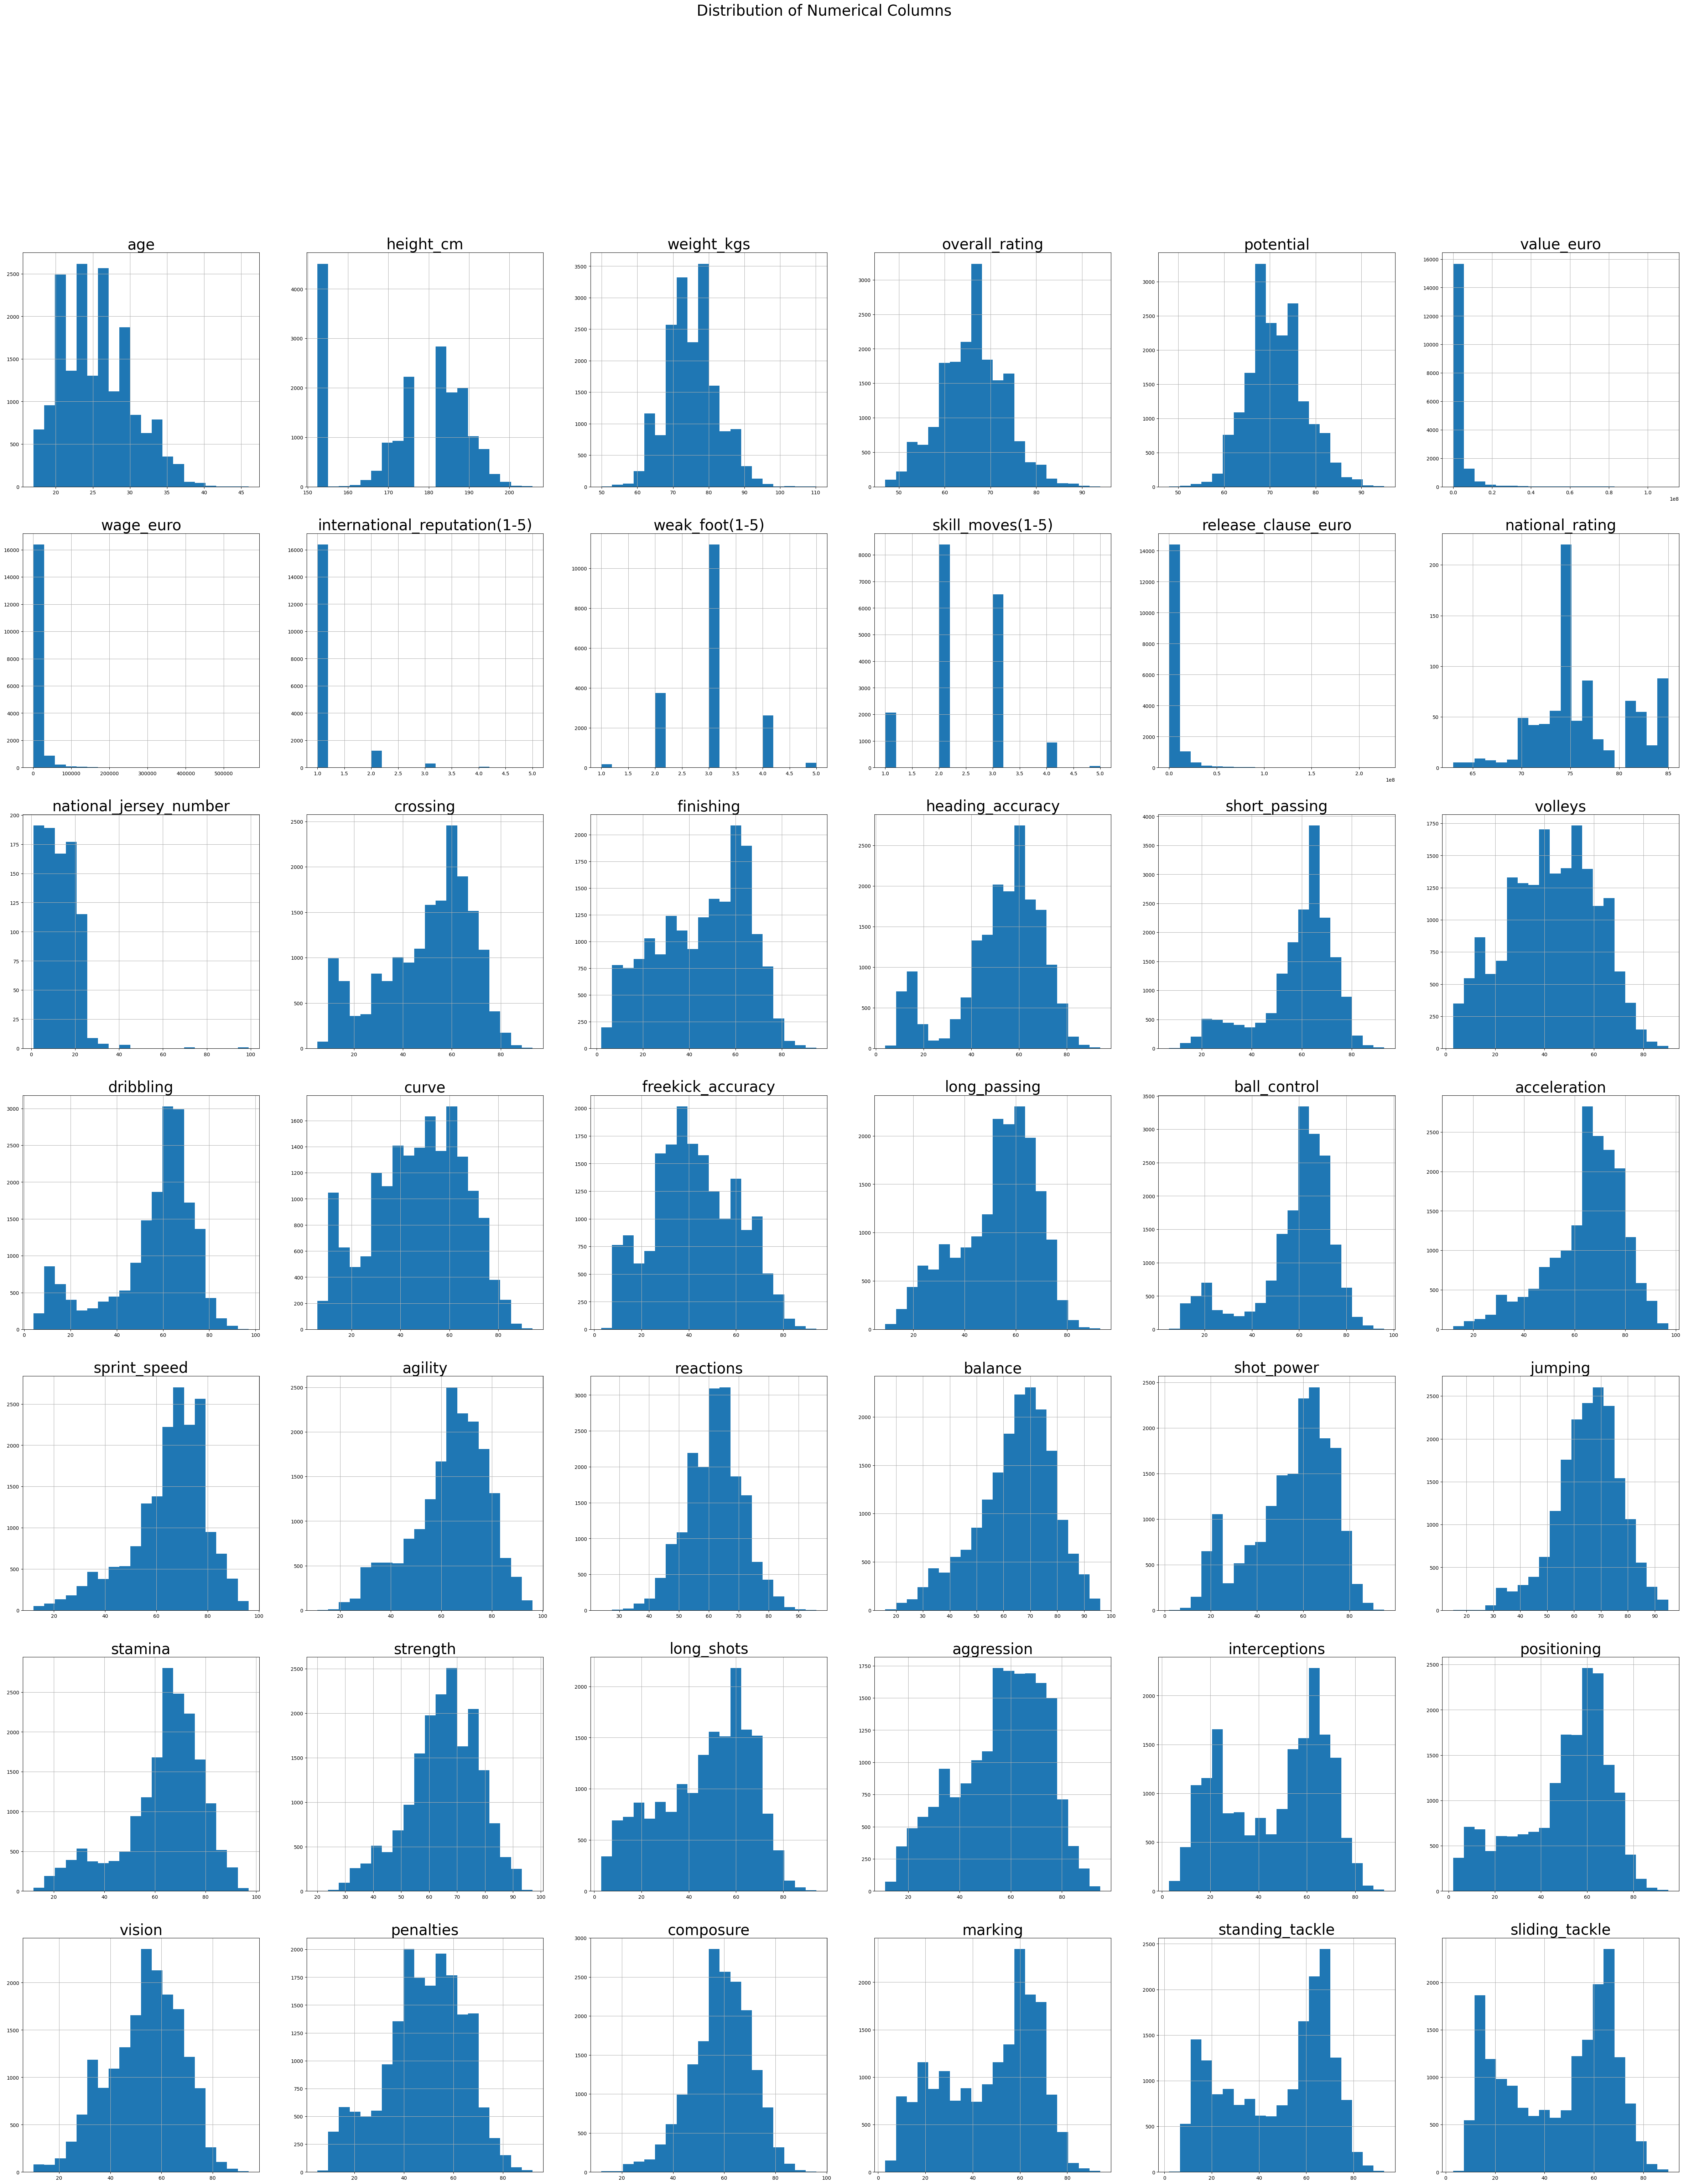

In [13]:


# Tính số dòng cần thiết dựa trên số lượng cột và số cột mong muốn
nrows = len(numerical_columns) // 6 + int(len(numerical_columns) % 6 != 0)

# Tạo biểu đồ histogram cho từng cột số
fig, axes = plt.subplots(nrows=nrows, ncols=6, figsize=(60, nrows * 10))
fig.suptitle("Distribution of Numerical Columns", fontsize=30)  # Đặt tiêu đề cho toàn bộ biểu đồ

# Vòng lặp để vẽ từng biểu đồ histogram
for i, column in enumerate(numerical_columns):
    ax = axes[i // 6, i % 6]
    df[column].hist(ax=ax, bins=20)

    ax.set_title(column, fontsize=30)  # Đặt tiêu đề cho từng biểu đồ

plt.show()

In [14]:
def missing_ratio(x):
    return x.isnull().mean() * 100

# Tạo DataFrame mới chỉ chứa các cột số
numerical_df = df[numerical_columns]

# Áp dụng hàm missing_ratio và tính giá trị tối thiểu và tối đa
result_df = numerical_df.agg([missing_ratio, 'min', 'max'])

# In kết quả
result_df

age  height_cm  weight_kgs  overall_rating  potential  \
missing_ratio   0.0       0.00         0.0             0.0        0.0   
min            17.0     152.40        49.9            47.0       48.0   
max            46.0     205.74       110.2            94.0       95.0   

                 value_euro      wage_euro  international_reputation(1-5)  \
missing_ratio  1.420296e+00       1.370168                            0.0   
min            1.000000e+04    1000.000000                            1.0   
max            1.105000e+08  565000.000000                            5.0   

               weak_foot(1-5)  skill_moves(1-5)  release_clause_euro  \
missing_ratio             0.0               0.0         1.023170e+01   
min                       1.0               1.0         1.300000e+04   
max                       5.0               5.0         2.265000e+08   

               national_rating  national_jersey_number  crossing  finishing  \
missing_ratio         95.22669                95.22669       0.0        0.0   
min                   63.00000                 1.00000       5.0        2.0   
max                   85.00000                99.00000      93.0       95.0   

               heading_accuracy  short_passing  volleys  dribbling  curve  \
missing_ratio               0.0            0.0      0.0        0.0    0.0   
min                         4.0            7.0      3.0        4.0    6.0   
max                        94.0           93.0     90.0       97.0   94.0   

               freekick_accuracy  long_passing  ball_control  acceleration  \
missing_ratio                0.0           0.0           0.0           0.0   
min                          3.0           9.0           5.0          12.0   
max                         94.0          93.0          96.0          97.0   

               sprint_speed  agility  reactions  balance  shot_power  jumping  \
missing_ratio           0.0      0.0        0.0      0.0         0.0      0.0   
min                    12.0     11.0       24.0     16.0         2.0     15.0   
max                    96.0     96.0       96.0     96.0        95.0     95.0   

               stamina  strength  long_shots  aggression  interceptions  \
missing_ratio      0.0       0.0         0.0         0.0            0.0   
min               12.0      20.0         3.0        11.0            3.0   
max               97.0      97.0        94.0        95.0           92.0   

               positioning  vision  penalties  composure  marking  \
missing_ratio          0.0     0.0        0.0        0.0      0.0   
min                    2.0    10.0        5.0       12.0      3.0   
max                   95.0    94.0       92.0       96.0     94.0   

               standing_tackle  sliding_tackle  
missing_ratio              0.0             0.0  
min                        2.0             3.0  
max                       93.0            90.0

#### Nhận xét
- Ta có thể thấy các giá trị min, max không có gì bất thường
- Tuy nhiên 2 cột `national_rating` và `national_jersey_number` có phần trăm missing khá lớn : 95.22669	 %
- Điều này có thể giải thích là vì một đất nước có số lượng cầu thủ khá nhiều có thể lên tới hàng nghìn, hàng triệu tuy nhiên số cầu thủ được gọi lên đội tuyển quốc gia chỉ là 20-30 cầu thủ nên rất ít cầu thủ trong dữ liệu được gọi lên đội tuyển quốc gia nên 2 cột `national_rating` và `national_jersey_number` được để trống

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

#### Có 2 loại dữ liệu phân loại:

- Một câu trả lời: `nationality`, `preferred_foot`, `body_type`, `national_team`, `national_team_position`
- Nhiều câu trả lời : `positions`

#### Tỷ lệ giá trị bị thiếu

In [15]:
# Tạo một DataFrame tạm thời để lưu thông tin tỷ lệ giá trị thiếu
missing_info_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])

# Lặp qua từng cột phân loại
for column in ['nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position', 'positions']:
    # Tính tỷ lệ giá trị thiếu
    missing_percentage = df[column].isnull().mean() * 100
    
    # Thêm thông tin vào DataFrame tạm thời
    missing_info_df = pd.concat([missing_info_df, pd.DataFrame({'Column': [column], 'Missing Percentage': [missing_percentage]})], ignore_index=True)

# In DataFrame với thông tin tỷ lệ giá trị thiếu
print("\nTỷ lệ giá trị bị thiếu:")
missing_info_df


Tỷ lệ giá trị bị thiếu:


/tmp/ipykernel_15233/4165361259.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_info_df = pd.concat([missing_info_df, pd.DataFrame({'Column': [column], 'Missing Percentage': [missing_percentage]})], ignore_index=True)


Column  Missing Percentage
0             nationality             0.00000
1          preferred_foot             0.00000
2               body_type             0.00000
3           national_team            95.22669
4  national_team_position            95.22669
5               positions             0.00000

**Nhận xét**
- Ta có thể thấy lượng giá trị bị thiếu của `national_team`  và `national_team_position` là rất lớn : 95.22669%
- Điều này cũng cùng nguyên nhân với tỷ lệ bị thiếu ở  2 cột `national_rating` và `national_jersey_number` như trên vì ít cầu thủ được gọi lên đội tuyển quốc gia


#### Phân bố của các cột có một câu trả lời 


Phân phối giá trị của 'nationality':
nationality
England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: count, dtype: int64


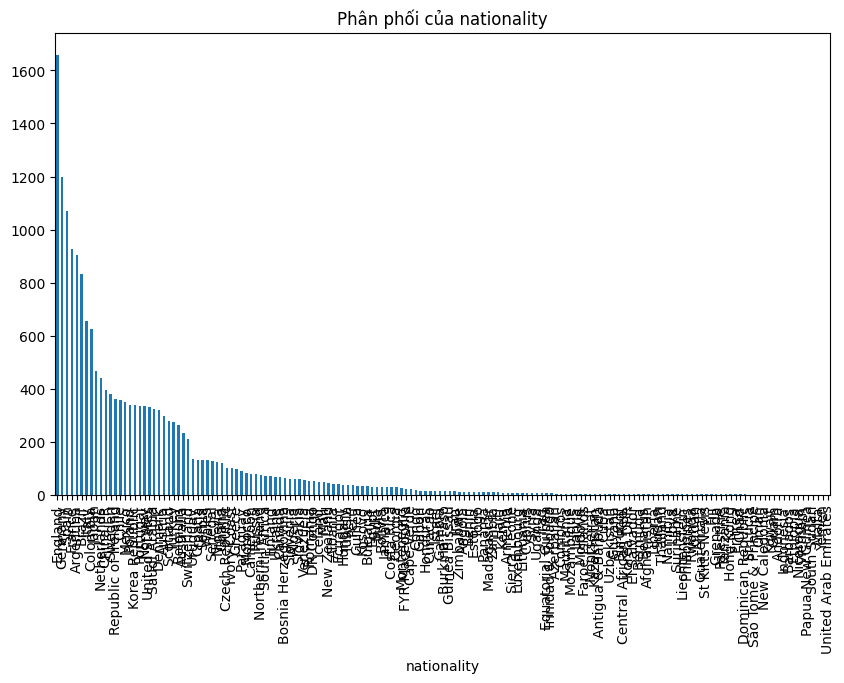


Phân phối giá trị của 'preferred_foot':
preferred_foot
Right    13781
Left      4173
Name: count, dtype: int64


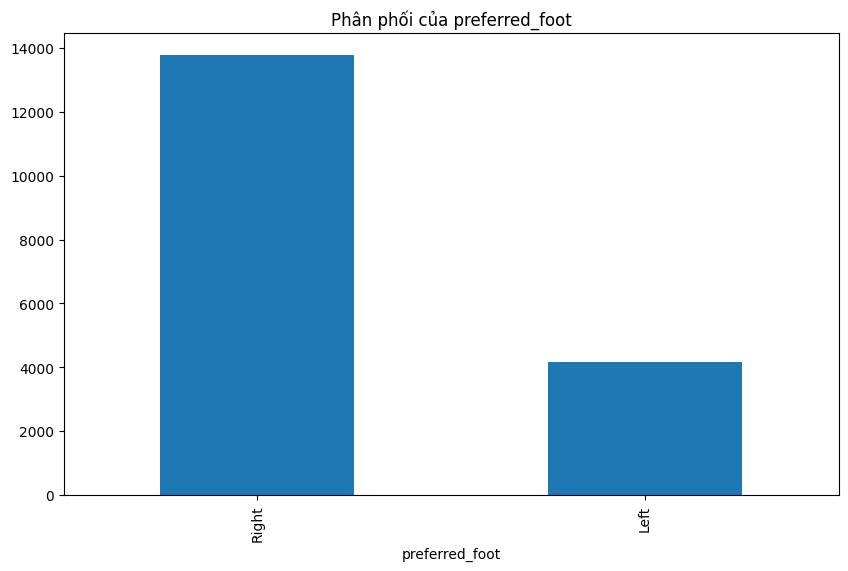


Phân phối giá trị của 'body_type':
body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64


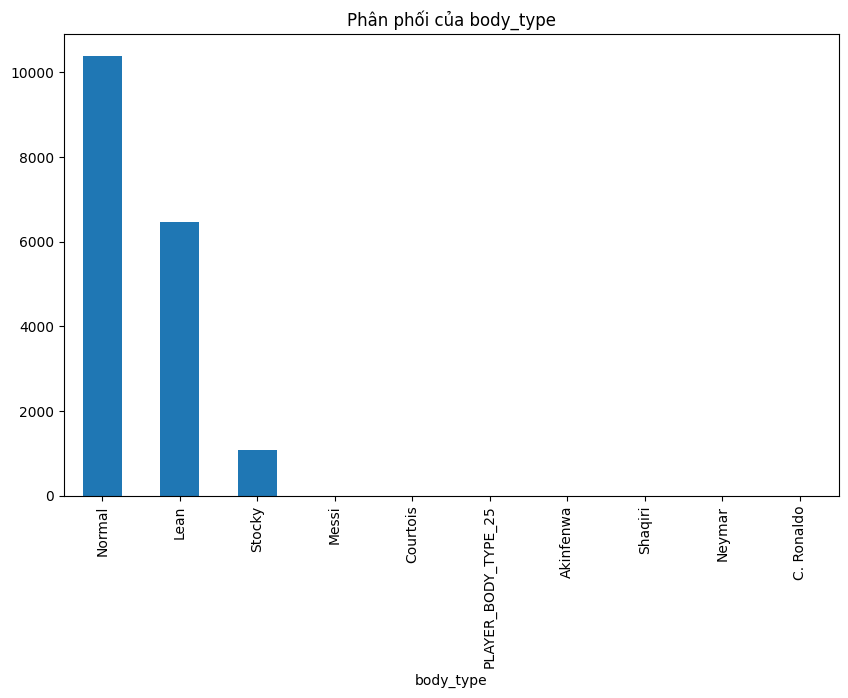


Phân phối giá trị của 'national_team':
national_team
Scotland         23
Brazil           23
France           23
Netherlands      23
Germany          23
Spain            23
Denmark          23
England          23
United States    23
Italy            22
Name: count, dtype: int64


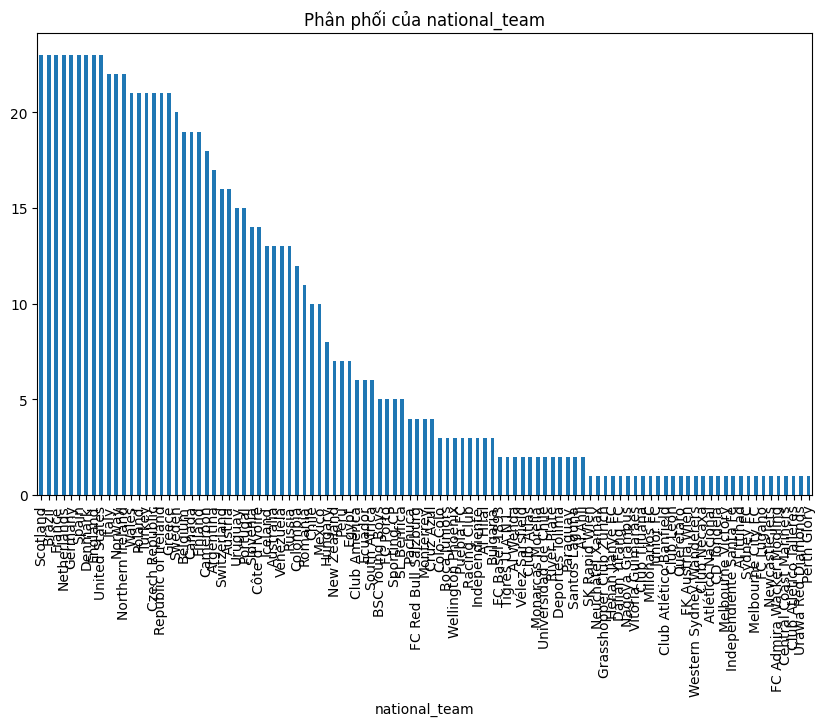


Phân phối giá trị của 'national_team_position':
national_team_position
SUB    389
GK      50
RCB     40
LCB     39
RB      34
LB      33
ST      30
LM      29
LCM     26
RM      26
Name: count, dtype: int64


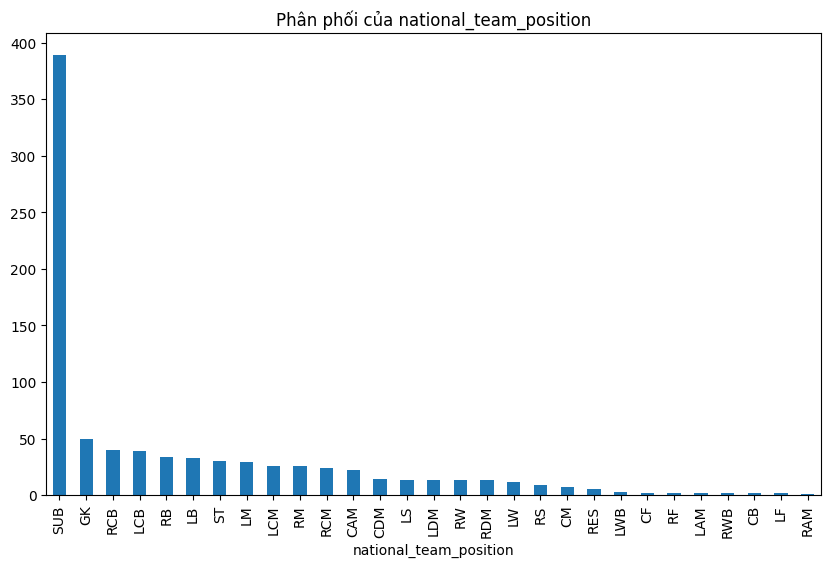

In [16]:
# Lặp qua từng cột phân loại
for column in ['nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position']:
    # Phân phối giá trị
    value_counts = df[column].value_counts()
    
    # In phân phối giá trị (hiển thị một số giá trị đầu tiên)
    print(f"\nPhân phối giá trị của '{column}':")
    print(value_counts.head(10))
    
    # Vẽ biểu đồ cột cho phân phối giá trị
    value_counts.plot(kind='bar', figsize=(10, 6), title=f'Phân phối của {column}')
    plt.show()

#### Phân bố của các cột có một câu trả lời

In [17]:
# Tính số lượng từng giá trị trong cột positions
positions_counts = df['positions'].str.split(',').explode().value_counts()

# In số lượng từng giá trị
print("Count of each position:")
print(positions_counts)

Count of each position:
positions
CM     3795
CB     3675
ST     3173
CDM    2699
LM     2521
RM     2452
CAM    2185
GK     2065
RB     2057
LB     2039
LW      957
RW      941
CF      362
RWB     314
LWB     299
Name: count, dtype: int64


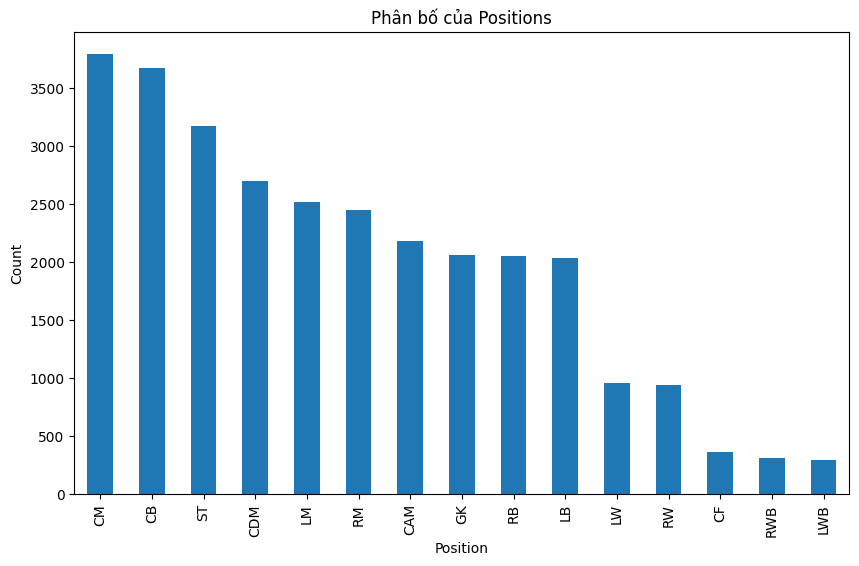

In [18]:
positions_counts.plot(kind='bar', figsize=(10, 6), title='Phân bố của Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

**Nhận xét**
- Nhìn chung các giá trị đều hợp lý
- Tuy nhiên , ta thấy ở cột `body_type` có một vài giá trị bất thường : `Messi, Courtois , PLAYER_BODY_TYPE_25, Akinfenwa  , Shaqiri , Neymar  , C.Ronaldo`. Những giá trị này là tên cầu thủ chứ không phải `body_type`.      1

# Làm sạch dữ liệu

In [19]:
df=pd.read_csv('./data/fifa_players.csv')
df_copy = df.copy()

In [20]:
df_copy.isna().sum().sort_values(ascending = False)

national_jersey_number           17097
national_team_position           17097
national_rating                  17097
national_team                    17097
release_clause_euro               1837
value_euro                         255
wage_euro                          246
name                                 0
shot_power                           0
ball_control                         0
acceleration                         0
sprint_speed                         0
agility                              0
reactions                            0
balance                              0
stamina                              0
jumping                              0
freekick_accuracy                    0
strength                             0
long_shots                           0
aggression                           0
interceptions                        0
positioning                          0
vision                               0
penalties                            0
composure                

In [21]:
#Bỏ các cột full NA 
df_copy.drop(columns = ['national_jersey_number' , 'national_team_position' , 'national_rating' , 'national_team' ], inplace = True)

In [22]:

moda_clause = df_copy['release_clause_euro'].mode()[0]
moda_value = df_copy['value_euro'].mode()[0]

#Vì điều khoản giải phóng hợp đồng và giá trị chuyển nhương lấy phổ biến 
df_copy['release_clause_euro'].fillna(moda_clause, inplace=True)
df_copy['value_euro'].fillna(moda_value, inplace=True)

#Lương tính theo tuần lấy trung bình
mediana_wage = df_copy['wage_euro'].median()
df_copy['wage_euro'].fillna(mediana_wage, inplace=True)

In [23]:
df_copy.isna().sum().sort_values(ascending = False)

name                             0
stamina                          0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power                       0
jumping                          0
strength                         0
curve                            0
long_shots                       0
aggression                       0
interceptions                    0
positioning                      0
vision                           0
penalties                        0
composure                        0
marking                          0
standing_tackle                  0
freekick_accuracy                0
dribbling                        0
full_name                        0
wage_euro                        0
birth_date                       0
age                              0
height_cm           

In [24]:

def plot_categorical_eda(cat):
    # Calculate number of rows
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))
    ax = ax.flat 
    for idx, variable in enumerate(cat):
        # Limit categories to top 10 and add 'Others'
        top_categories = cat[variable].value_counts().head(10)
        top_categories.loc['Others'] = cat[variable].value_counts().iloc[10:].sum()
        top_categories.plot.barh(ax=ax[idx])
        ax[idx].set_title(variable, fontsize=12, fontweight="bold")
        ax[idx].tick_params(labelsize=12)

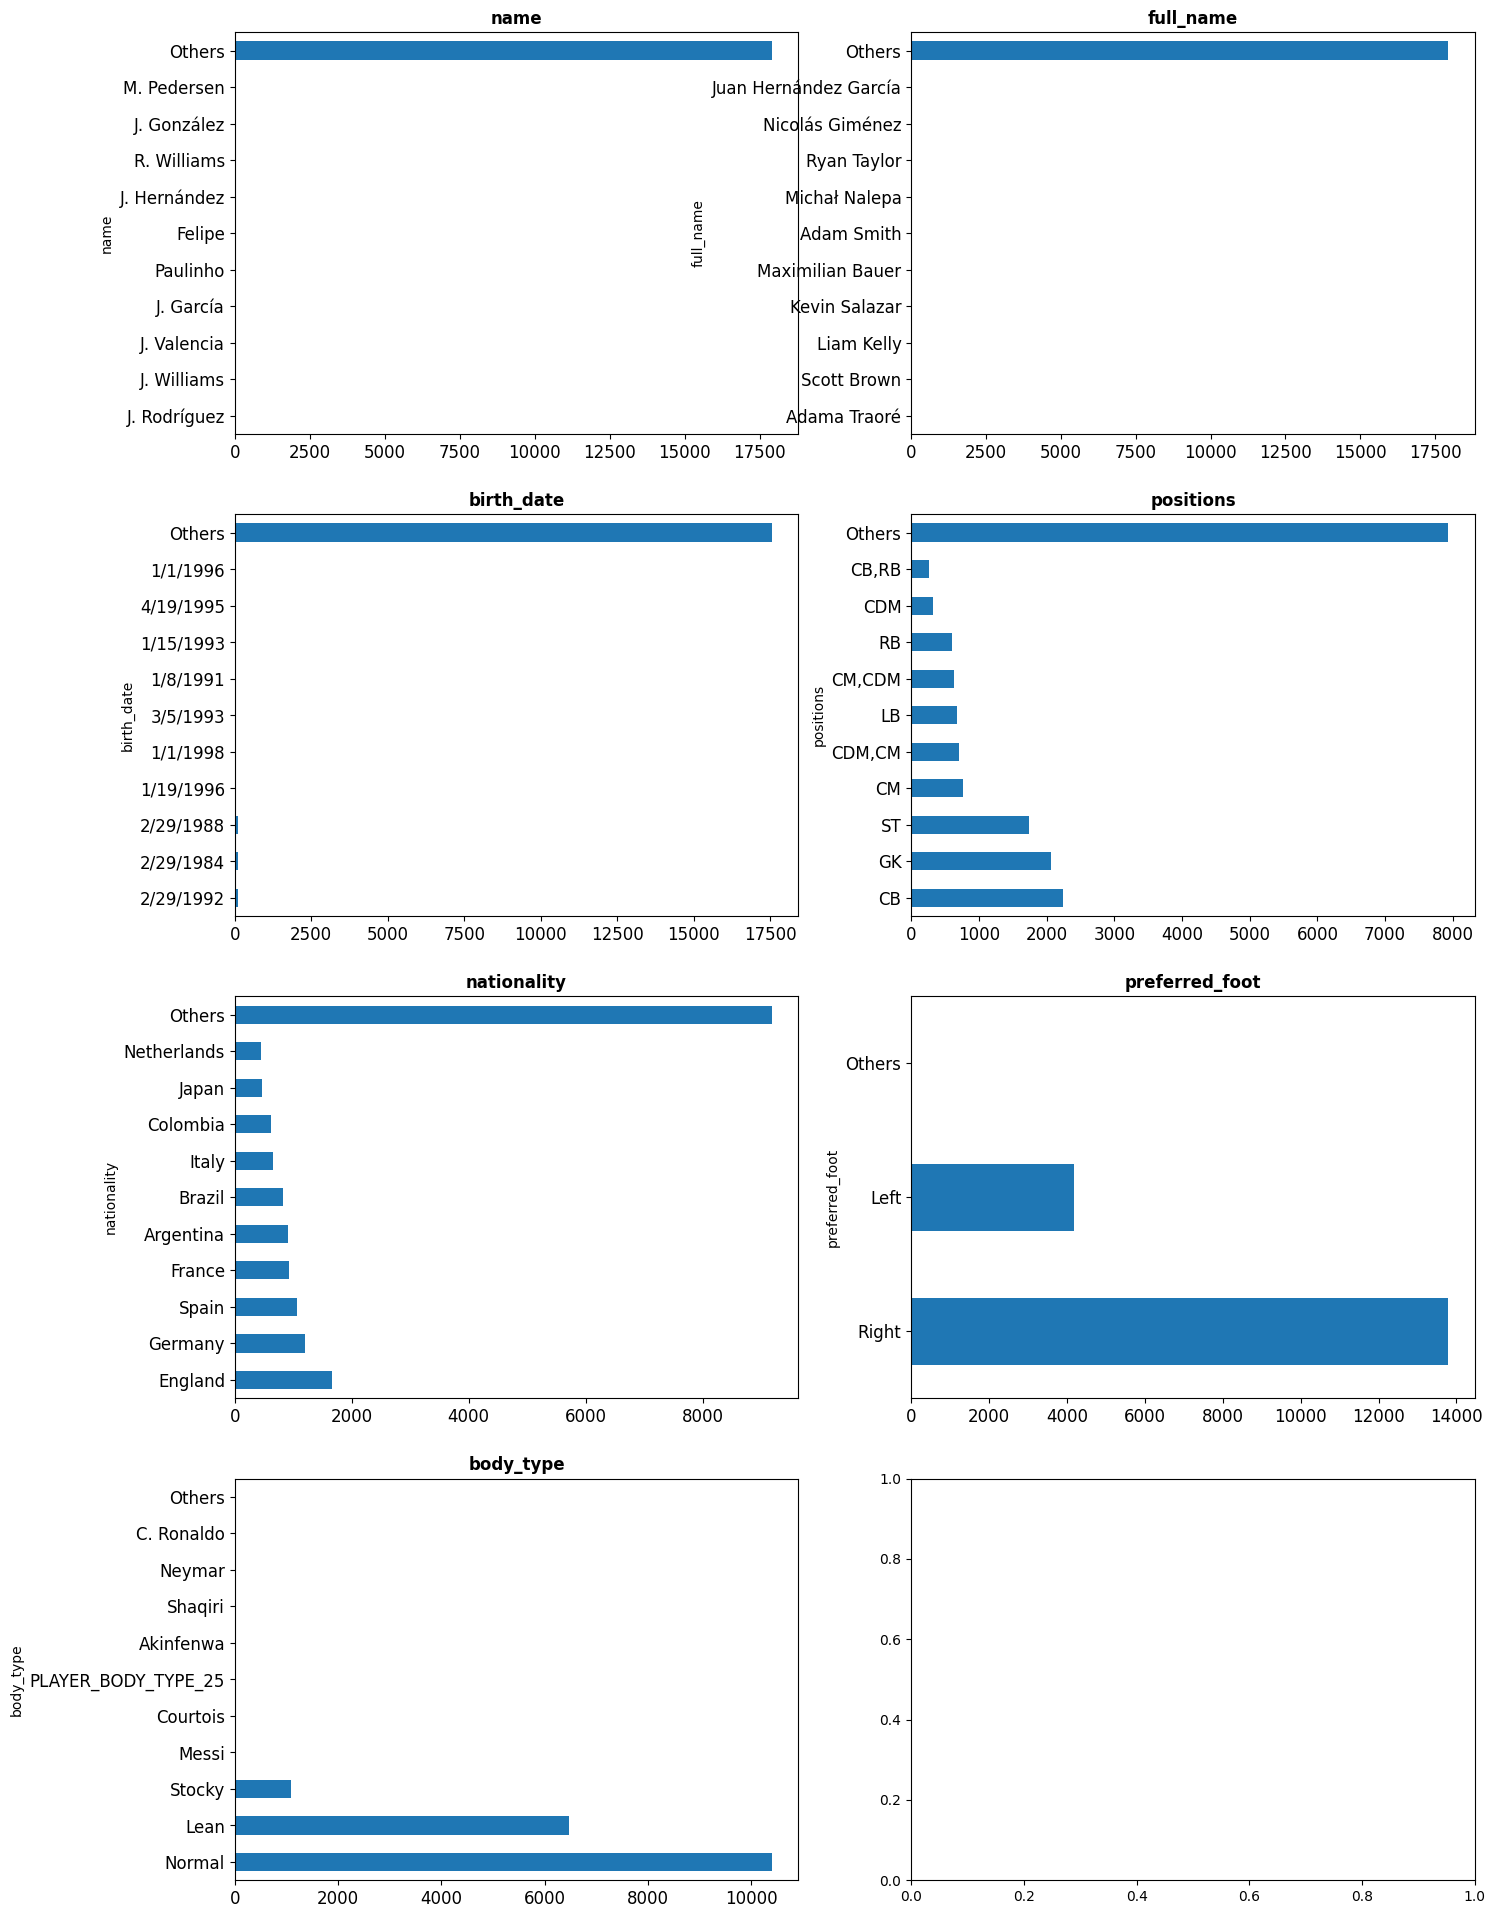

In [25]:
#Visualize để xem xét các cột oject có mang lại thông tin hữu ích không
plot_categorical_eda(df_copy.select_dtypes('O'))

Nhận xét: các cột name, full_name, birth_date, body_type không đem lại nhiều thông tin hữu ích nên cần lọc bớt


In [26]:
df_copy.drop(['name' , 'full_name' , 'birth_date' , 'body_type'], axis = 1, inplace = True)


In [27]:
import plotly.express as px

fig_rating_value = px.scatter(df_copy, x='overall_rating', y='value_euro', title='Overall Rating vs. Market Value', labels={'value_euro': 'Market Value (Euro)', 'overall_rating': 'Overall Rating'})
fig_rating_value.show()

In [39]:
fig_potential_wage = px.scatter(df_copy, x='potential', y='wage_euro', title='Potential vs. Wage', labels={'wage_euro': 'Wage (Euro)', 'potential': 'Potential'})
fig_potential_wage.show()

In [40]:
# Assuming 'positions' column contains positions separated by commas,
# we'll extract the primary position (the first one listed)
df_copy['primary_position'] = df_copy['positions'].str.split(',').str[0]

# Creating a boxplot of Wage Distribution by Primary Player Positions
fig = px.box(df_copy, x='primary_position', y='wage_euro', title='Wage Distribution by Primary Player Positions')
fig.update_traces(quartilemethod="exclusive")  # or "inclusive", as per your preference
fig.update_layout(xaxis_title='Primary Position', yaxis_title='Wage (Euro)', xaxis={'categoryorder':'total descending'})
fig.show()

In [41]:
# Creating age groups
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 20, 25, 30, 35, 40, 100], labels=['<20', '21-25', '26-30', '31-35', '36-40', '>40'])

# Creating a boxplot
fig_age_group = px.box(df_copy, x='age_group', y='value_euro', title='Market Value Distribution by Age Groups')
fig_age_group.update_layout(xaxis_title='Age Group', yaxis_title='Market Value (Euro)')
fig_age_group.show()

In [48]:
df_copy['physical'] = (df_copy["strength"] + df_copy["sprint_speed"] + df_copy["agility"] + df_copy["reactions"] + df_copy["stamina"] +
                   df_copy["jumping"] + df_copy["balance"] + df_copy["acceleration"])/8

df_copy['defensive_skill'] = (df_copy["sliding_tackle"] + df_copy["standing_tackle"] + df_copy["interceptions"] + df_copy["marking"] +
                          df_copy["positioning"] + df_copy["aggression"])/6

df_copy["football_skills"] = (df_copy["ball_control"] + df_copy["short_passing"] + df_copy["long_passing"] + df_copy["composure"] +
                          df_copy["vision"] + df_copy["dribbling"])/6

df_copy["offensive_skills"] = (df_copy["crossing"] + df_copy["finishing"] + df_copy["long_shots"] + df_copy["volleys"] +
                           df_copy["heading_accuracy"])/5

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Defining the features and target variable
features = ['physical', 'defensive_skill', 'football_skills', 'offensive_skills']
targets = ['value_euro', 'wage_euro']

# Splitting the dataset
X = df_copy[features]
y = df_copy[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Function to train and evaluate models
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        results[target] = {}
        for name, model in models.items():
            # Training the model on one target at a time
            model.fit(X_train, y_train[target])

            # Predicting on the test set
            y_pred = model.predict(X_test)

            # Evaluating the model
            rmse = mean_squared_error(y_test[target], y_pred, squared=False)  # Calculate RMSE
            r2 = r2_score(y_test[target], y_pred)  # Calculate R²

            # Storing results
            results[target][name] = {'RMSE': rmse, 'R²': r2}
    
    return results

# Now, use this function to train and evaluate each model
model_results = train_evaluate_models(models, X_train, X_test, y_train, y_test)

# Viewing the results
for target in model_results:
    print(f"Results for {target}:")
    for model_name, metrics in model_results[target].items():
        print(f"  {model_name}: RMSE - {metrics['RMSE']}, R² - {metrics['R²']}")
    print()

Results for value_euro:
  Linear Regression: RMSE - 5626259.573791131, R² - 0.15068647586051176
  Random Forest: RMSE - 3154869.7720644856, R² - 0.7329507370168769
  Gradient Boosting: RMSE - 3111355.3056856347, R² - 0.7402666437832417
  Support Vector Regression: RMSE - 6364587.00958864, R² - -0.08684838877949907

Results for wage_euro:
  Linear Regression: RMSE - 22589.99857422385, R² - 0.11591003858087201
  Random Forest: RMSE - 14886.208386232924, R² - 0.6160875106362871
  Gradient Boosting: RMSE - 14369.335966489252, R² - 0.6422847539979952
  Support Vector Regression: RMSE - 24721.875439574473, R² - -0.05883156616346863



In [50]:
# Feature importance from the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train['value_euro'])  # Example for 'value_euro' target

# Extracting feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
import plotly.express as px
fig_importance = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances for Market Value Prediction')
fig_importance.show()

In [ ]:
#pip install tensorflow
#pip install keras

In [51]:
# List of columns to drop
columns_to_drop = ['full_name', 'birth_date', 'nationality', 'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number']

data = df.drop(columns=columns_to_drop)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  object 
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

In [54]:
from sklearn.preprocessing import LabelEncoder

# Create a label (category) encoder object
le = LabelEncoder()

# Fit and transform the 'positions' column
data['positions'] = le.fit_transform(data['positions'])

# Fit and transform the 'body_type' column
data['body_type'] = le.fit_transform(data['body_type'])

In [55]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  int64  
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  int64  
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define target variable
target = 'overall_rating'

# Split the data into features (X) and target (y)
X = data.drop([target, 'name'], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: ', loss)

2023-12-29 17:31:47.780896: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 17:31:47.781042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 17:31:47.785024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 17:31:47.803507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-29 17:31:49.889245: W tensorflow/compiler/tf2

Epoch 1/10
449/449 [==============================] - 3s 5ms/step - loss: 36.5101
Epoch 2/10
449/449 [==============================] - 3s 7ms/step - loss: 4.8626
Epoch 3/10
449/449 [==============================] - 3s 6ms/step - loss: 4.5737
Epoch 4/10
449/449 [==============================] - 2s 5ms/step - loss: 4.2015
Epoch 5/10
449/449 [==============================] - 2s 5ms/step - loss: 3.4661
Epoch 6/10
449/449 [==============================] - 2s 4ms/step - loss: 3.3657
Epoch 7/10
449/449 [==============================] - 2s 4ms/step - loss: 2.9587
Epoch 8/10
449/449 [==============================] - 2s 5ms/step - loss: 3.1322
Epoch 9/10
449/449 [==============================] - 2s 4ms/step - loss: 2.4789
Epoch 10/10
113/113 [==============================] - 1s 3ms/step - loss: 1.5883
Test Loss:  1.5883241891860962


In [57]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Print the first 10 predicted and actual values
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

113/113 [==============================] - 1s 3ms/step
Predicted: [63.509552], Actual: 64
Predicted: [57.990337], Actual: 56
Predicted: [58.584774], Actual: 59
Predicted: [61.02141], Actual: 61
Predicted: [72.82737], Actual: 74
Predicted: [57.672577], Actual: 59
Predicted: [60.15511], Actual: 59
Predicted: [59.26277], Actual: 60
Predicted: [71.385574], Actual: 71
Predicted: [63.102097], Actual: 63


In [58]:
# Calculate the residuals for the test set
residuals_test = np.abs(y_test - y_pred.reshape(-1))

# Get the indices of the top 10 most off predictions in the test set
top10_test_indices = residuals_test.argsort()[-10:]

# Print the top 10 most off predictions in the test set and their corresponding names
print("Top 10 most off predictions in the test set:")
for i in top10_test_indices:
    print(f"Name: {df.loc[X_test.index[i], 'name']}, Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

# Calculate the residuals for the training set
y_pred_train = model.predict(X_train)
residuals_train = np.abs(y_train - y_pred_train.reshape(-1))

# Get the indices of the top 10 most off predictions in the training set
top10_train_indices = residuals_train.argsort()[-10:]

# Print the top 10 most off predictions in the training set and their corresponding names
print("Top 10 most off predictions in the training set:")
for i in top10_train_indices:
    print(f"Name: {df.loc[X_train.index[i], 'name']}, Predicted: {y_pred_train[i]}, Actual: {y_train.iloc[i]}")

Top 10 most off predictions in the test set:
Name: T. Strakosha, Predicted: [76.71072], Actual: 82
Name: D. Sappa, Predicted: [67.30239], Actual: 62
Name: J. Greatorex, Predicted: [54.422348], Actual: 49
Name: Yang Zhi, Predicted: [70.50031], Actual: 65
Name: M. Prinz, Predicted: [60.57425], Actual: 55
Name: L. Ward, Predicted: [61.052086], Actual: 55
Name: Chen Wei, Predicted: [59.099903], Actual: 53
Name: L. Ntumba, Predicted: [64.276085], Actual: 57
Name: A. Søndergaard, Predicted: [61.59011], Actual: 54
Name: Shen Shuaishuai, Predicted: [63.3052], Actual: 54
449/449 [==============================] - 1s 2ms/step
Top 10 most off predictions in the training set:
Name: Y. Lenze, Predicted: [63.821888], Actual: 57
Name: J. Walton, Predicted: [59.918068], Actual: 53
Name: C. Cáceda, Predicted: [61.932617], Actual: 69
Name: P. Bernardoni, Predicted: [67.46391], Actual: 75
Name: L. Plogmann, Predicted: [67.81125], Actual: 60
Name: J. Moreno, Predicted: [61.132416], Actual: 53
Name: L. McC